In [1]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing libraries
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

2025-02-04 18:12:52.497186: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 18:12:57.774476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv("final.csv", low_memory=False)
df.head()

,Sl no,Name,Profile ID,Comment,Comment_Tokens,comment_length,word_count,sentiment_score,sentiment_class
0,1,scotty2jatty,398274122,you better do dirty,"better,dirty",19,4,0,neutral
1,2,angelasanders975,65963290409,thats soooooooooo right,"thats,soooooooooo,right",23,3,0,neutral
2,3,myleslewis_24,11687291106,bro i want that shirt,"bro,want,shirt",21,5,1,positive
3,4,miladheydarpour1369,7529960718,good,good,4,1,3,positive
4,5,matthew_williams224,25240207448,bro he only needs to beat jakes ass,"bro,needs,beat,jakes,ass",35,8,-7,negative


In [4]:
# Define a mapping dictionary for sentiment classes
sentiment_mapping = {
    'neutral': 1,
    'positive': 1,
    'negative': 0
}

# Apply the mapping to the 'sentiment_class' column to create a numerical 'sentiment_label'
df['sentiment_label'] = df['sentiment_class'].map(sentiment_mapping)

# Display the first few rows to confirm
print(df[['sentiment_label', 'sentiment_class']].head())

   sentiment_label sentiment_class
0                1         neutral
1                1         neutral
2                1        positive
3                1        positive
4                0        negative


In [5]:
df['sentiment_class'] = df['sentiment_class'].replace('neutral', 'positive')

In [6]:
df.head()


,Sl no,Name,Profile ID,Comment,Comment_Tokens,comment_length,word_count,sentiment_score,sentiment_class,sentiment_label
0,1,scotty2jatty,398274122,you better do dirty,"better,dirty",19,4,0,positive,1
1,2,angelasanders975,65963290409,thats soooooooooo right,"thats,soooooooooo,right",23,3,0,positive,1
2,3,myleslewis_24,11687291106,bro i want that shirt,"bro,want,shirt",21,5,1,positive,1
3,4,miladheydarpour1369,7529960718,good,good,4,1,3,positive,1
4,5,matthew_williams224,25240207448,bro he only needs to beat jakes ass,"bro,needs,beat,jakes,ass",35,8,-7,negative,0


In [7]:
vocab_size = 10000
one_hot_representation = [one_hot(words,vocab_size) for words in df['Comment']]

In [8]:
for i in range(0, 4):
  print(one_hot_representation[i])

[4569, 5182, 9893, 3296]
[7619, 1138, 8263]
[8052, 874, 6146, 5634, 4821]
[8140]


In [9]:
sentence_length = 20
embedded_comment = pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)

In [10]:
for i in range(0, 4):
  print(embedded_comment[i])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 4569 5182 9893 3296]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 7619 1138 8263]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 8052  874 6146 5634 4821]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 8140]


In [11]:
x = np.array(embedded_comment)
y= np.array(df['sentiment_label'])

In [12]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x.shape,x_train.shape, x_test.shape


((5089, 20), (4071, 20), (1018, 20))

In [14]:
# creating a model

dimension = 50
model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length=sentence_length),
    #LSTM layers (stacked)
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(x_train, y_train, epochs=10,batch_size=32)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5664 - loss: 0.7535
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8481 - loss: 0.3669
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9525 - loss: 0.1358
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9732 - loss: 0.0848
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9891 - loss: 0.0378
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9987 - loss: 0.0090
Epoch 7/10
128/128 ━━━━━━━━━

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8799 - loss: 0.6627
Model Accuracy: 86.84%


In [18]:
model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[1.13508424e-04, 9.99876857e-01, 9.59972749e-06],
       [8.51047635e-01, 1.48832664e-01, 1.19733973e-04],
       [1.33185356e-04, 9.99854326e-01, 1.24298349e-05],
       ...,
       [1.13508424e-04, 9.99876857e-01, 9.59972749e-06],
       [1.14411967e-04, 9.99874711e-01, 1.08226877e-05],
       [9.95763898e-01, 4.19080071e-03, 4.51989508e-05]], dtype=float32)

In [19]:
Pred= np.argmax(model.predict(x_test),axis = -1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [20]:
y_test[:5]
Pred[:5]


array([1, 0, 1, 1, 0])

In [21]:
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       473
           1       0.88      0.88      0.88       545

    accuracy                           0.87      1018
   macro avg       0.87      0.87      0.87      1018
weighted avg       0.87      0.87      0.87      1018



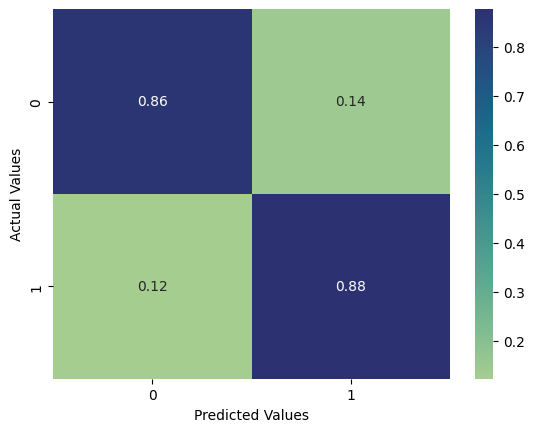

In [22]:


cf = confusion_matrix(y_test, Pred,normalize='true')
sns.heatmap(cf, annot=True,cmap ='crest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, mean_absolute_error, mean_squared_error
import numpy as np



y_pred = Pred
# Precision
precision = precision_score(y_test, y_pred, average='macro')  # Adjust `average` for binary/multiclass
print(f"Precision: {precision:.4f}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

# Mean Absolute Percentage Error (MAPE)
non_zero_mask = y_test != 0  # Mask for non-zero values
mape = np.mean(np.abs((y_test[non_zero_mask] - y_pred[non_zero_mask]) / y_test[non_zero_mask])) * 100
print(f"MAPE (excluding zeros): {mape:.2f}%")


Precision: 0.8677
Accuracy: 0.8684
MAE: 0.1316
MSE: 0.1316
RMSE: 0.3628
MAPE (excluding zeros): 12.29%


In [24]:
model.save('BILSTM.h5')
model.save('BILSTM.keras')